In [10]:
import json
import os
from pprint import pprint
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

'''
This sample makes a call to the Bing Image Search API with a text query and returns relevant images with data.
Documentation: https: // docs.microsoft.com/en-us/azure/cognitive-services/bing-web-search/
'''

# Add your Bing Search V7 subscription key and endpoint to your environment variables.
subscriptionKey = "0c21c1c15d764a7dbb40f8127412f847"
endpoint = "https://api.bing.microsoft.com" + "/v7.0/images/search"

# Query to search for
#query = "tomato diseases cucumber mosaic virus"
#query = "tomato stem rot"
#query = "healthy raw potato leaves"
#query ='leaves apple cedar apple rust'
query = 'healthy peach leaves'

# Construct a request
mkt = 'en-US'
params = {'q': query, 'mkt': mkt, 'count':150}
headers = {'Ocp-Apim-Subscription-Key': subscriptionKey}

# Call the API
try:
    response = requests.get(endpoint, headers=headers, params=params)
    response.raise_for_status()

    print("\nHeaders:\n")
    print(response.headers)

    #print("\nJSON Response:\n")
    #pprint(response.json())
    
    search_results = response.json()
    thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"]]


    i = 0
    for t in thumbnail_urls:
        image_data = requests.get(t)
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        image.save(f'data/web/{i}.png')
        i += 1
except Exception as ex:
    raise ex
    
    



Headers:

{'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'Content-Length': '216404', 'Content-Type': 'application/json; charset=utf-8', 'Expires': '-1', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'BingAPIs-TraceId': 'DBC1DA01EE44415E848E01A14DF49DAA', 'X-MSEdge-ClientID': '173E1CC70B8B6A062E2A13190A3C6B37', 'X-MSAPI-UserState': '7a6a', 'X-Search-ResponseInfo': 'InternalResponseTime=398,MSDatacenter=BN2B', 'X-MSEdge-Ref': 'Ref A: DBC1DA01EE44415E848E01A14DF49DAA Ref B: BLUEDGE0716 Ref C: 2021-02-14T04:58:07Z', 'apim-request-id': '3fa105f6-4344-46c8-afb1-9f95b8b86359', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'x-content-type-options': 'nosniff', 'CSP-Billing-Usage': 'CognitiveServices.BingSearchV7.Transaction=1', 'Date': 'Sun, 14 Feb 2021 04:58:07 GMT'}


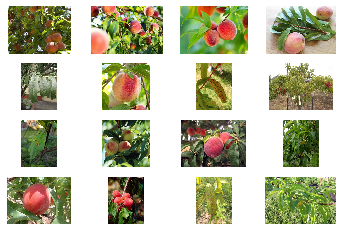

<Figure size 2880x2880 with 0 Axes>

In [11]:
f, axes = plt.subplots(4, 4)
plt.figure(figsize=(40, 40))
for i in range(4):
    for j in range(4):
        image_data = requests.get(thumbnail_urls[i+4*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
plt.show()

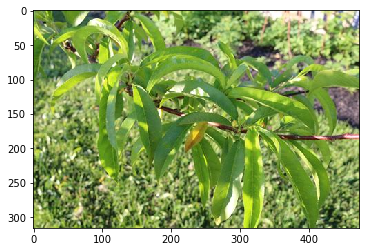

In [12]:
plt.imshow(image)